# ICA 
Independent Components Analysis
1. Background: 
    1. 鸡尾酒会混合音源分离提取；数据降维
    2. 假设：
       - 成分独立
       - 线性混合
       - 非高斯性分布
           1. Kurtosis 四阶累积量
           2. Negentropy 负熵
           3. 互信息最小化
    3. 不确定性
3. 对比PCA
    - PCA: 降维，但对高斯分布样本有效；ICA: 降维，样本服从非高斯性分布
    - PCA将数据映射到新的低维空间，并且各维度不相关；ICA是寻找数据可能成分组，用于提取特征
4. 数据分析流程
    1. 中心化和白化（减少特征相关性；特征具有相同方差（即协方差阵是单位阵))

In [4]:
import os
import numpy as np
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [6]:
sample_data_folder = mne.datasets.sample.data_path()

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|######################################| 1.65G/1.65G [00:00<00:00, 828GB/s]
Untarring contents of 'C:\Users\Pv14-2018\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\Pv14-2018\mne_data'


Attempting to create new mne-python configuration file:
C:\Users\Pv14-2018\.mne\mne-python.json


In [7]:
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
print(raw)

Opening raw data file C:\Users\Pv14-2018\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>


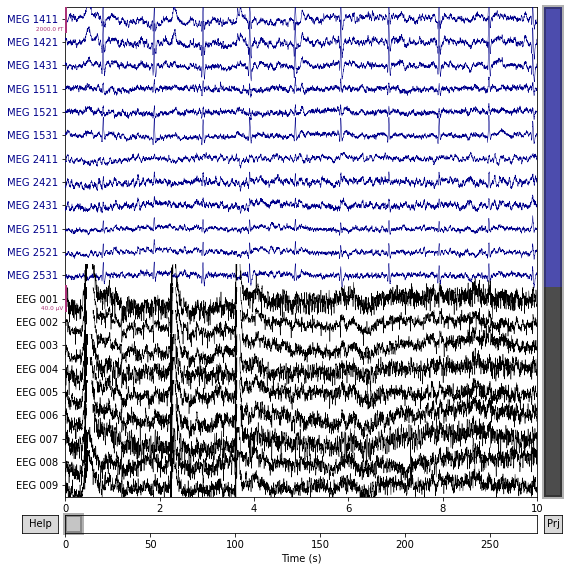

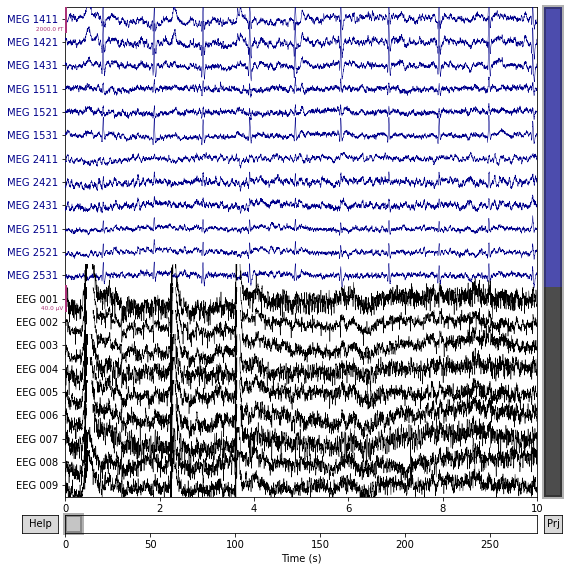

In [9]:
regexp = r'(MEG [12][45][123]1|EEG 00.)'
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(order=artifact_picks, n_channels=len(artifact_picks),show_scrollbars=True)

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected: 46
Not setting metadata
Not setting metadata
46 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
Loading data for 46 events and 601 original time points ...
0 bad epochs dropped
Applying baseli

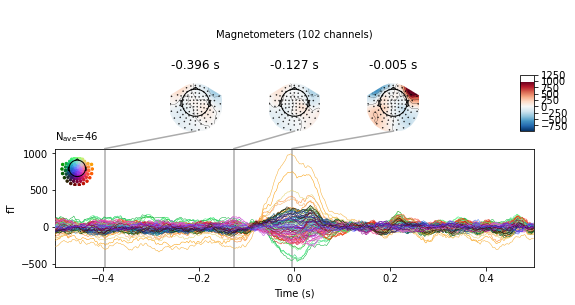

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


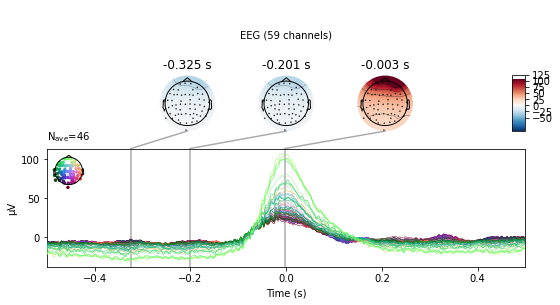

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


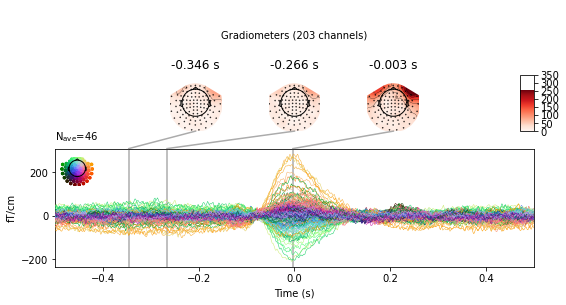

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [14]:
eog_evoked = create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, 0.2))
eog_evoked.plot_joint()

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Number of ECG events detected : 283 (average pulse 61 / min.)
Not setting metadata
Not setting metadata
283 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
Loading data for 283 events and 601 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...


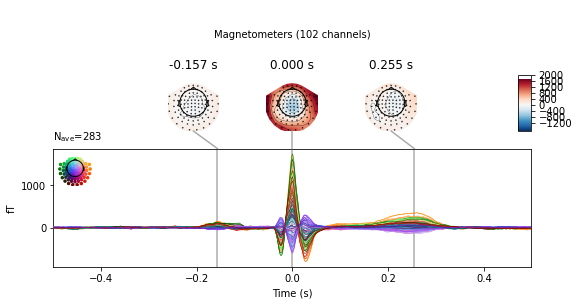

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


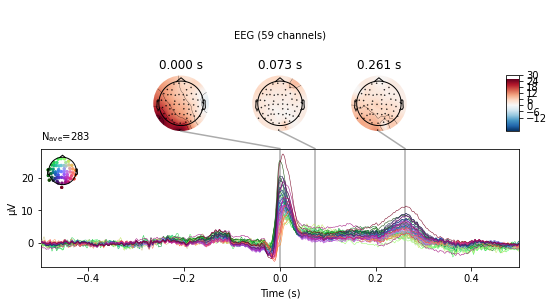

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


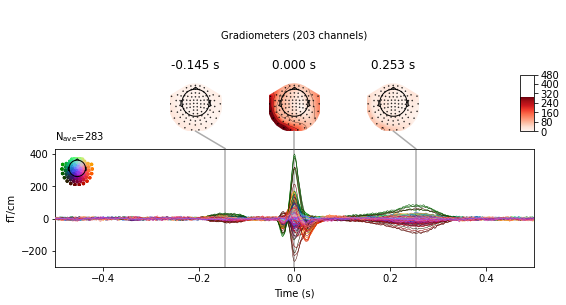

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [15]:
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

In [16]:
#过滤低频漂移
filt_raw = raw.copy() #创建副本
filt_raw.load_data().filter(l_freq=1., h_freq=None)

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1983 samples (3.302 sec)



<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 15.0s.
Creating RawArray with float64 data, n_channels=16, n_times=166800
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


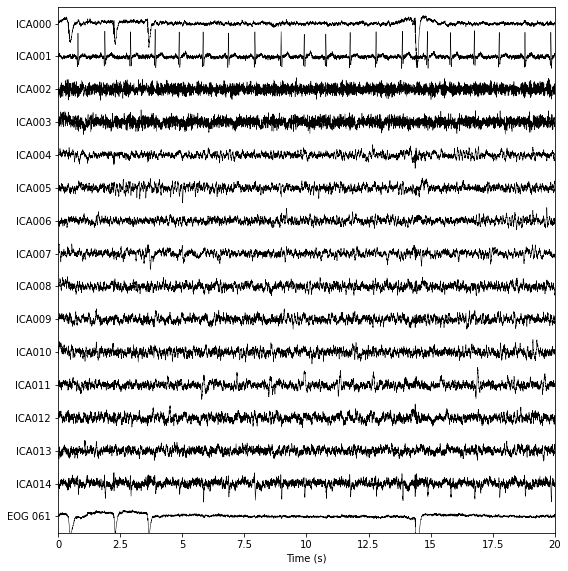

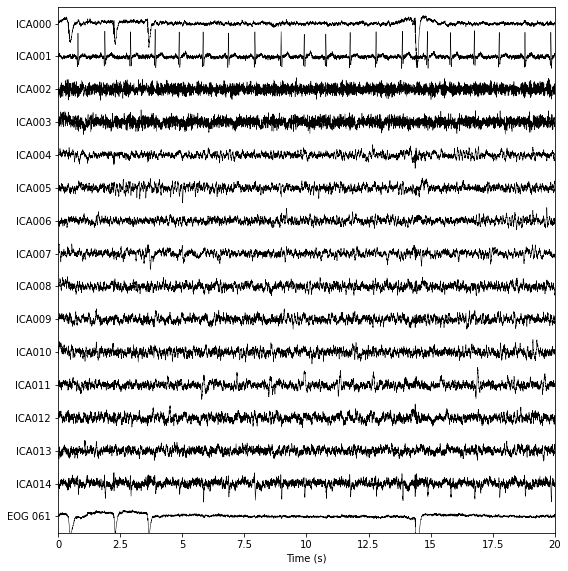

In [18]:
ica = ICA(n_components=15, random_state=97)
ica.fit(filt_raw)
#ICA结果的可视化呈现
filt_raw.load_data()
ica.plot_sources(filt_raw, show_scrollbars=False)

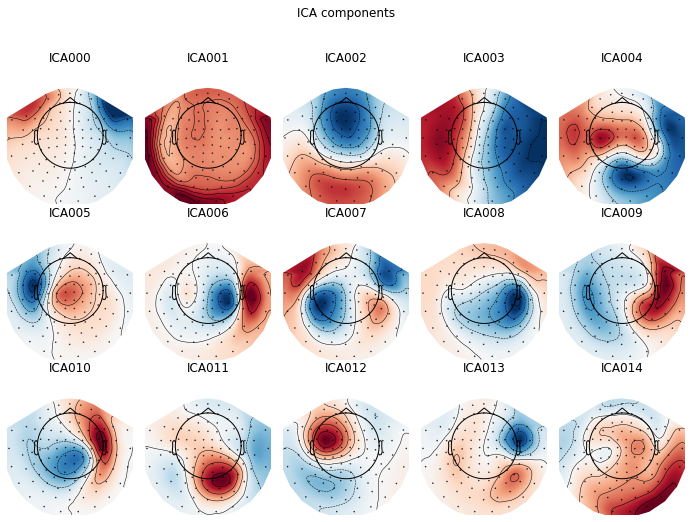

[<MNEFigure size 702x526.68 with 15 Axes>]

In [19]:
ica.plot_components()

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 364 PCA components


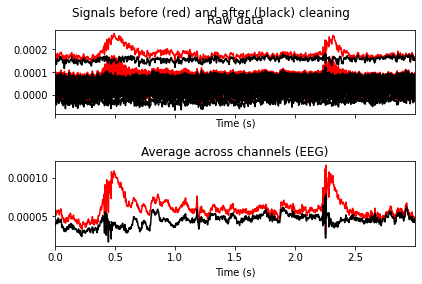

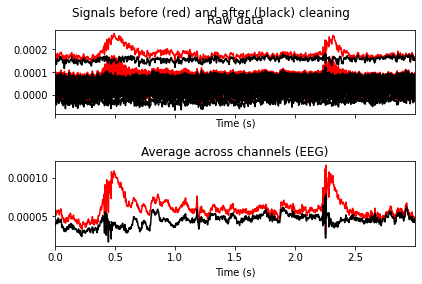

In [21]:
# blinks 
ica.plot_overlay(raw.load_data(), exclude=[0], picks='eeg')
#选择EEG，是因为EEG更容易监测到眨眼活动。exclude=[0]中的0是指上面的ICA000。

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 364 PCA components


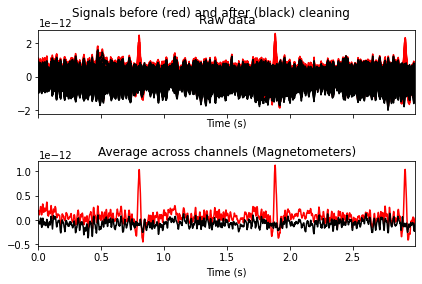

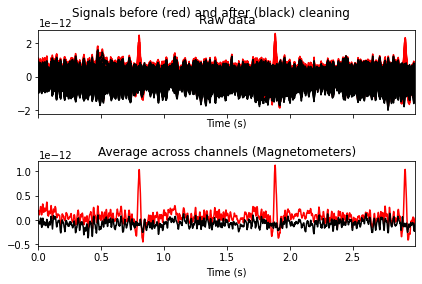

In [22]:
# heartbeats 
ica.plot_overlay(raw.load_data(), exclude=[1], picks='mag')
#选择MAG，是因为MAG更容易监测到心脏跳动。exclude=[1]中的1是指上面的ICA001。

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


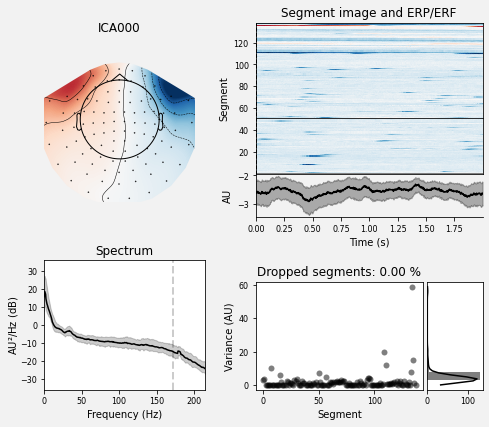

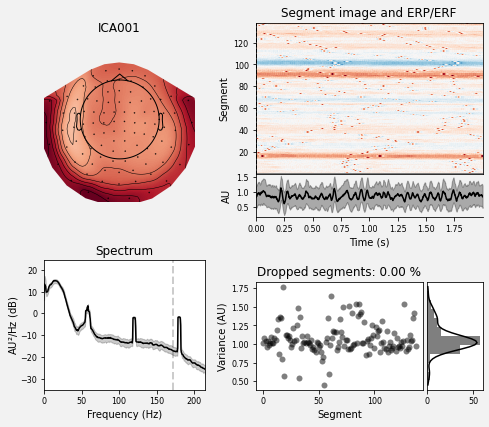

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [23]:
ica.plot_properties(raw.load_data(), picks=[0, 1])
#选择ICA000和ICA001